In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider, HBox, VBox, Dropdown, Output, Label

#gates
def xor(inputs):
    return np.array([-1 if (x == 1 and y == -1) or (x == -1 and y == 1) else 1 for x, y in inputs])

def and_gate(inputs):
    return np.array([1 if (x == 1 and y == 1) else -1 for x, y in inputs])

def nand_gate(inputs):
    return np.array([-1 if (x == 1 and y == 1) else 1 for x, y in inputs])

def or_gate(inputs):
    return np.array([1 if (x == 1 or y == 1) else -1 for x, y in inputs])

# 2-layer, relu
def nn(inputs, weights_layer1, weights_layer2):
    def relu(x):
        return np.maximum(0, x)
    layer1_output = relu(np.dot(inputs, weights_layer1))
    output = np.dot(layer1_output, weights_layer2)
    return output

#plot stuff
def plot_decision_boundary_colored(weights_layer1, weights_layer2, logic_gate, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(5, 5))
    ax.clear()

    x_min, x_max = -2, 2
    y_min, y_max = -2, 2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # compute all possible outputs
    output = nn(grid, weights_layer1, weights_layer2)
    
    # normalize and plot
    normalized_output = (output - output.min()) / (output.max() - output.min())
    normalized_output = normalized_output.reshape(xx.shape)
    ax.contourf(xx, yy, normalized_output, alpha=0.7, cmap='RdBu', levels=100)
    logic_gate_output = logic_gate(inputs)
    for i, input_data in enumerate(inputs):
        if logic_gate_output[i] == 1:
            ax.scatter(input_data[0], input_data[1], color='blue', edgecolor='k')
        else:
            ax.scatter(input_data[0], input_data[1], color='red', edgecolor='k')
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Decision Boundary')
    
    return ax

def interactive_plot(w11, w12, w21, w22, w31, w32, gate):
    weights_layer1 = np.array([[w11, w12], [w21, w22]])
    weights_layer2 = np.array([w31, w32])
    
    logic_gate = {'XOR': xor, 'AND': and_gate, 'NAND': nand_gate, 'OR': or_gate}[gate]
    
    fig, ax = plt.subplots(figsize=(5, 5))
    plot_decision_boundary_colored(weights_layer1, weights_layer2, logic_gate, ax=ax)
    plt.show()
    
    success = check_success(weights_layer1, weights_layer2, logic_gate)
    success_label.value = "Success!" if success else "Try again..."

#win condition
def check_success(weights_layer1, weights_layer2, logic_gate):
    outputs = np.where(nn(inputs, weights_layer1, weights_layer2) == 0, 1, -1)
    expected_outputs = logic_gate(inputs)
    success = np.all(outputs == expected_outputs)
    return success

# all possible (discrete) inputs. since we dont use bias we need data to be normalized, so -1 instead of 0
inputs = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])

#GUI
w11_slider = FloatSlider(value=-1, min=-1, max=1, step=0.01, description='w11')
w11_slider.value = np.random.randn()
w12_slider = FloatSlider(value=1, min=-1, max=1, step=0.01, description='w12')
w12_slider.value = np.random.randn()
w21_slider = FloatSlider(value=1, min=-1, max=1, step=0.01, description='w21')
w21_slider.value = np.random.randn()
w22_slider = FloatSlider(value=-1, min=-1, max=1, step=0.01, description='w22')
w22_slider.value = np.random.randn()
w31_slider = FloatSlider(value=1, min=-1, max=1, step=0.01, description='w31')
w31_slider.value = np.random.randn()
w32_slider = FloatSlider(value=1, min=-1, max=1, step=0.01, description='w32')
w32_slider.value = np.random.randn()

gate_selector = Dropdown(
    options=['XOR', 'AND', 'NAND', 'OR'],
    value='XOR',
    description='Gate:',
)

success_label = Label(value="")

interactive_plot = interactive(interactive_plot, w11=w11_slider, w12=w12_slider, w21=w21_slider, w22=w22_slider, w31=w31_slider, w32=w32_slider, gate=gate_selector)
widgets = VBox([interactive_plot, HBox([w11_slider, w12_slider, w21_slider, w22_slider, w31_slider, w32_slider]), gate_selector, success_label])

display(widgets)


# If you give up, Let the optimizer do it

[[-9.17232134e-05]
 [-9.42332930e-01]
 [-7.17119839e-01]
 [-8.63335910e-04]]
[[ 1.]
 [-1.]
 [-1.]
 [ 1.]]
Input: [-1 -1], Predicted Output: [1.], Expected Output: [1]
Input: [-1  1], Predicted Output: [-1.], Expected Output: [-1]
Input: [ 1 -1], Predicted Output: [-1.], Expected Output: [-1]
Input: [1 1], Predicted Output: [1.], Expected Output: [1]

The network solves XOR correctly: True


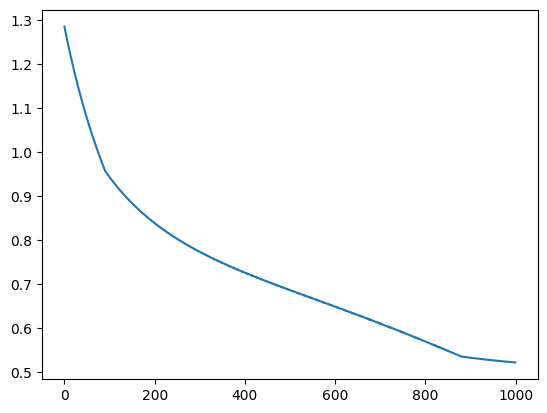

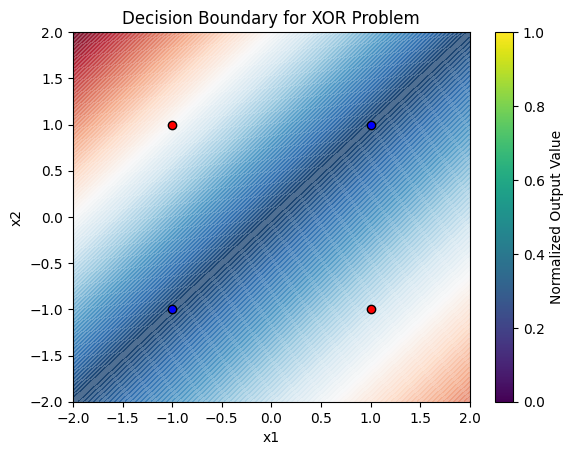

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def xor_nn(inputs, weights_layer1, weights_layer2):
    layer1_output = relu(np.dot(inputs, weights_layer1))
    output = np.dot(layer1_output, weights_layer2)
    print(output)
    for i in range(len(output)):
        if output[i] > 0.5 or output[i] < -0.5:
            output[i] = -1
        else:
            output[i] = 1
    print(output)

    return output

def train_xor_nn(inputs, expected_outputs, learning_rate=0.001, epochs=1000):
    # Initialize weights randomly between -1 and 1
    weights_layer1 = np.random.uniform(-1, 1, (2, 2))
    weights_layer2 = np.random.uniform(-1, 1, (2, 1))

    losses =[]

    for _ in range(epochs):
        # Forward pass
        layer1_input = np.dot(inputs, weights_layer1)
        layer1_output = relu(layer1_input)
        output = np.dot(layer1_output, weights_layer2)

        # Compute the error
        error = expected_outputs - output
        loss = np.mean(np.square(error))
        #print(f'{inputs=}, {expected_outputs=}, {output=}, {error=}')

        # Backpropagation
        dweights_layer2 = np.dot(layer1_output.T, error)
        dweights_layer1 = np.dot(inputs.T, np.dot(error, weights_layer2.T) * relu_derivative(layer1_input))

        # Update weights
        weights_layer2 += learning_rate * dweights_layer2
        weights_layer1 += learning_rate * dweights_layer1

        losses.append(loss)

    return weights_layer1, weights_layer2, losses

def plot_decision_boundary_colored(weights_layer1, weights_layer2):
    # Create a high-resolution grid of points
    x_min, x_max = -2, 2
    y_min, y_max = -2, 2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Compute the neural network output for each point in the grid
    layer1_output = relu(np.dot(grid, weights_layer1))
    output = np.dot(layer1_output, weights_layer2)
    
    # Normalize the output to be between 0 and 1 for colormap
    normalized_output = (output - output.min()) / (output.max() - output.min())
    normalized_output = normalized_output.reshape(xx.shape)
    
    # Plot the decision boundary using a colormap with a continuous range
    plt.contourf(xx, yy, normalized_output, alpha=0.7, cmap='RdBu', levels=100)
    
    # Plot the input points
    for i, input_data in enumerate(inputs):
        if expected_outputs[i] == 1:
            plt.scatter(input_data[0], input_data[1], color='blue', edgecolor='k')
        else:
            plt.scatter(input_data[0], input_data[1], color='red', edgecolor='k')
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Decision Boundary for XOR Problem')
    plt.colorbar(label='Normalized Output Value')
    plt.show()

#set seed
np.random.seed(42)
# Define the input data for XOR with normalized inputs
inputs = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
# Define the expected outputs for XOR
expected_outputs = np.array([[1], [-1], [-1], [1]])

# Train the network
weights_layer1, weights_layer2, losses = train_xor_nn(inputs, expected_outputs)

# Test the network with the inputs
outputs = xor_nn(inputs, weights_layer1, weights_layer2)
plt.plot(losses)
plt.figure()
# Print the results
for i, input_data in enumerate(inputs):
    print(f"Input: {input_data}, Predicted Output: {outputs[i]}, Expected Output: {expected_outputs[i]}")

# Check if the network works as expected
correct = np.all(outputs == expected_outputs)
print(f"\nThe network solves XOR correctly: {correct}")

plot_decision_boundary_colored(weights_layer1, weights_layer2)
